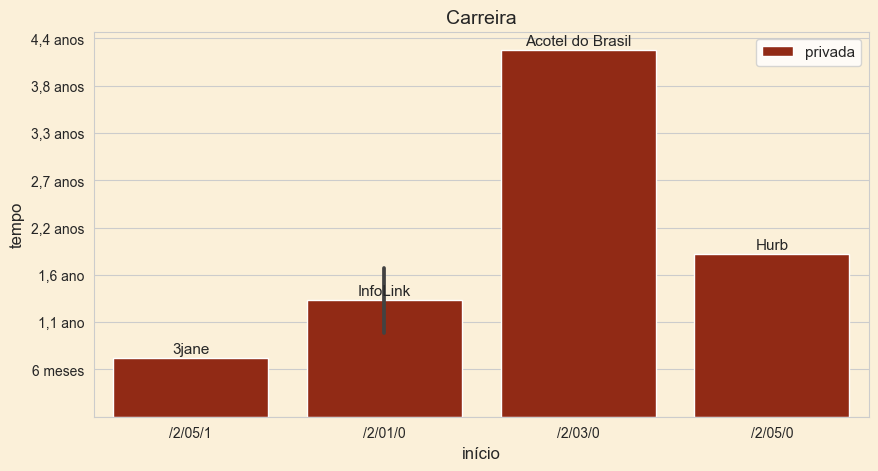

In [12]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns


def format_y_axis(y_param, _pos):
    y_axis = ''

    anos = y_param / 365

    if anos >= 1:
        ano_str = 'anos' if anos >= 2 else 'ano'

        y_axis = f'{anos:.1f} {ano_str}'.replace('.', ',')
    elif y_param > 0:
        meses = int(np.mod(y_param, 365) / 30)

        y_axis = f'{meses} meses'

    return y_axis


def format_date(date):
    return datetime.strptime(date, "%d/%m/%Y")


if __name__ == "__main__":
    sns.set_style('whitegrid')
    # %matplotlib inline

    carreira = pd.read_csv('carreira.csv', delimiter=';')
    carreira['inicio'] = carreira['entrada'].apply(
        lambda entrada: f'{entrada[3:7]}/{entrada[0:4]}')
    carreira['entrada'] = carreira['entrada'].apply(format_date)
    carreira['saida'] = carreira['saida'].apply(format_date)
    carreira['tempo'] = carreira['saida'] - carreira['entrada'] + pd.Timedelta(
        days=1)
    carreira['dias'] = carreira['tempo'].apply(
            lambda tempo: int(tempo.total_seconds() / (24 * 3600)))
    carreira['anos'] = carreira['dias'].apply(
            lambda dias: pd.Timedelta(days=dias).components.days) // 365
    carreira['meses'] = carreira['dias'].apply(
            lambda dias: pd.Timedelta(days=dias).components.days % 365) // 30

    BGCOLOR = '#fbf0d9'

    fig = plt.figure(figsize=(10, 5))
    fig.set_facecolor(BGCOLOR)

    formatter = ticker.FuncFormatter(format_y_axis)

    ax = plt.gca()
    ax.yaxis.set_major_formatter(formatter)
    ax.set_facecolor(BGCOLOR)

    sns.barplot(data=carreira, x='inicio', y='dias', hue='esfera',
                palette=sns.color_palette('#a61c00 #1c4587'.split()))

    plt.title('Carreira', fontsize=14)
    plt.xlabel('início', fontsize=12)
    plt.ylabel('tempo', fontsize=12)
    plt.legend(fontsize=11)

    for bar_container in ax.containers:
        for rectangle in bar_container:
            idx = bar_container.index(rectangle)

            height = bar_container[idx].get_height()

            x_pos = bar_container[idx].get_x() + bar_container.patches[
                    idx].get_width() / 2

            y_pos = height + 20

            text = carreira.iloc[idx]['instituicao']

            ax.annotate(text, xy=(x_pos, y_pos), ha='center', fontsize=11)

    plt.show()
